In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("shampoo.csv")

In [12]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


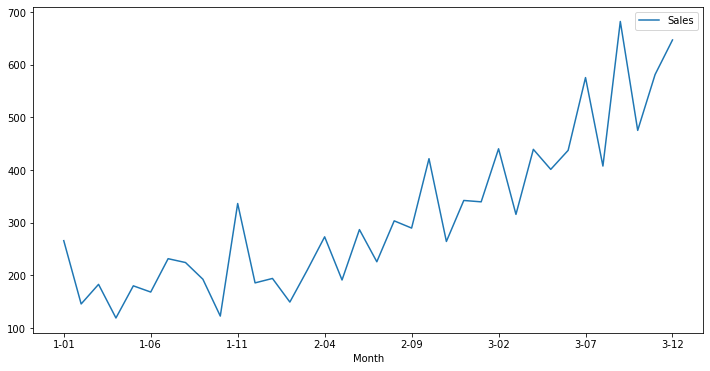

In [13]:
ax = df.plot(x='Month', y='Sales', figsize=(12,6))

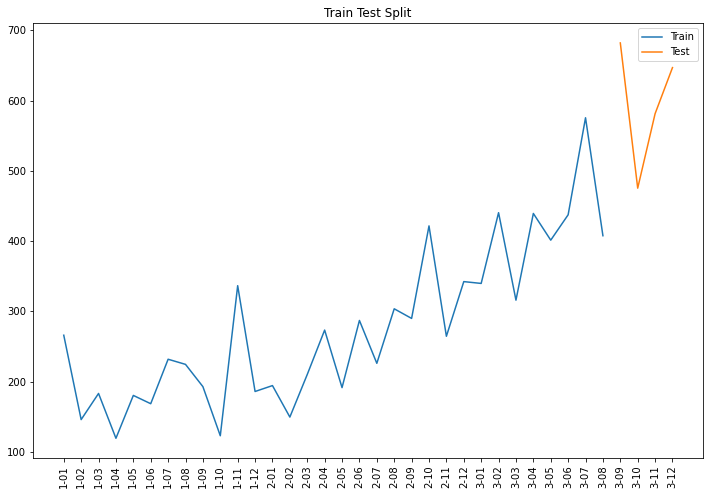

In [15]:
total_data = df["Month"].count()
split = (total_data * 0.90).astype(np.int32)
train = df[0:split] 
test = df[split:]
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.xticks(df["Month"], df["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()

# Naive Approch

In [16]:
predictions_nv = test.copy()
# Copy the last observed Sales from training data
predictions_nv["Predictions"] = train.tail(1).iloc[0]["Sales"]
print (predictions_nv)

   Month  Sales  Predictions
32  3-09  682.0        407.6
33  3-10  475.3        407.6
34  3-11  581.3        407.6
35  3-12  646.9        407.6


In [17]:
#Measuring performance:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Sales"], \
                               predictions_nv["Predictions"]))
print("Naive Mean Square Error (RMSE): %.3f" % rmse)

Naive Mean Square Error (RMSE): 204.521


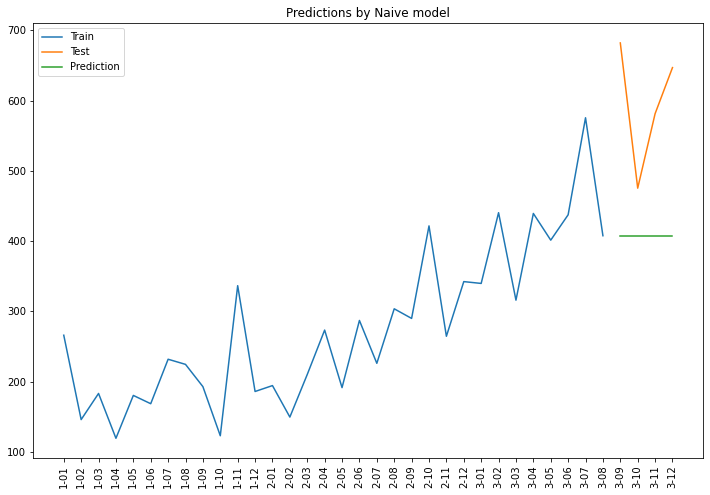

In [19]:
#Plotting the predictions w.r.t. test values:

plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.plot(predictions_nv.Month, predictions_nv.Predictions, label='Prediction')
plt.xticks(df["Month"], df["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Predictions by Naive model")
plt.show()

# Moving Average 

In [20]:
import pandas as pd
import numpy as np
# Create a numpy array of years and sales
arr = np.array([['2000', 4], ['2001',7],
                ['2002',4], ['2003',9],
                ['2004',7], ['2005',10]])

# Transpose array
arr_tp = arr.transpose()

# Create a dataframe
df = pd.DataFrame({'Years': arr_tp[0], 'Sales': arr_tp[1]})

# Calculate rolling mean
df['MA'] = df['Sales'].rolling(window=3).mean()

df.head()

,Years,Sales,MA
0,2000,4,NaN
1,2001,7,NaN
2,2002,4,5.000000
3,2003,9,6.666667
4,2004,7,6.666667


In [30]:
df['MA'] = df['MA'].fillna(0)
df['Sales'] = df['Sales'].astype(float, errors = 'raise')


In [31]:
df.dtypes

Years     object
Sales    float64
MA       float64
dtype: object

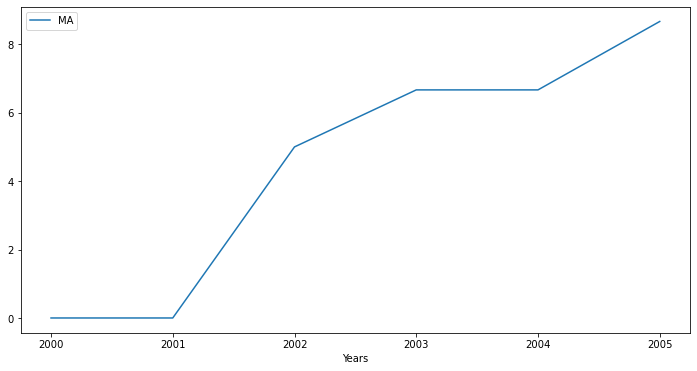

In [34]:
ax1 = df.plot(x='Years', y='MA', figsize=(12,6))